# CS675 Introduction to Data Science - Project #2

**Aayushi Verma**

The aim of this project is to build machine learning models for a dataset and evaluate the models. We will start by cleaning the dataset, then building machine learning models according to the brief provided. We will derive meaningful results from the models and compare them to each other to find the best model.

The dataset is a CSV file containing data about customer churn from the telecommunication industry. Churn is an important metric for businesses to analyze because high churn rates indicate unsatisfied customers, whereas low churn rates indicate satisfied customers, i.e. customers are less likely to leave this company and take their business elsewhere. Therefore it is important for companies to be able to understand their churn rates, predict future churn rates, and optimize their services to have continuing low churn rates.

According to the brief, we are to use the following four algorithms on the dataset to derive predictions for customers churning:
1. Naive Bayes
2. Logistic Regression
3. Random Forest
4. XGBoost

We use these four models in three stages of analysis:
1. normal techniques for predictions
2. using SMOTE techniques for addressing data imbalance in predictions
3. normally, but using hyperparameter tuning to optimize the model for predictions (only Random Forest and XGBoost)

We will compare the following metrics for each model and analysis stage:
1. Accuracy
2. Precision
3. Recall
4. F1 Score

We will be using Recall as the defining metric to evaluate these models and stages of analysis. Finally we will evaluate the best model and stage of analysis for this dataset in predicting churn.

I have done a video walkthrough of this code as well, available here: https://www.youtube.com/watch?v=VVIC3dSqqk8&t=25s

## Step One: Data Preparation

This code is derived from my code for [Project #1](https://github.com/awesomecosmos/CS675-Intro-To-Data-Science/tree/main/Project1), where I already performed Exploratory Data Analysis (EDA) on the same dataset. In this section, I have simply copy-pasted my earlier code for cleaning the data.

In [1]:
# importing packages for data cleaning, visualization, and EDA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import statsmodels
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import xgboost as xgb
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# reading the raw CSV data file
df = pd.read_csv("telco-customer-churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# getting unique values from each column, so we know which values to convert to numerical
for col in df.columns:
    print(col,df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [5]:
# performing label encoding 
for col in df.columns:
    # we will only use 0 and 1 for binary values
    df.loc[df[col] == "Yes", col] = 1
    df.loc[df[col] == "No", col] = 0
    df.loc[df[col] == "Female", col] = 0
    df.loc[df[col] == "Male", col] = 1
    # everything else we will represent with a distinct integer
    df.loc[df[col] == "No phone service", col] = 2
    df.loc[df[col] == "No internet service", col] = 3
    df.loc[df[col] == "DSL", col] = 4
    df.loc[df[col] == "Fiber optic", col] = 5
    df.loc[df[col] == "Month-to-month", col] = 6
    df.loc[df[col] == "One year", col] = 7
    df.loc[df[col] == "Two year", col] = 8
    df.loc[df[col] == "Electronic check", col] = 9
    df.loc[df[col] == "Mailed check", col] = 10
    df.loc[df[col] == "Bank transfer (automatic)", col] = 11
    df.loc[df[col] == "Credit card (automatic)", col] = 12
    # we will set missing values to -1, so that we know that these correspond to missing values
    df.loc[df[col] == " ", col] = -1

In [6]:
# obtaining list of all columns which we need to convert
cols_to_convert_to_int = df.columns[np.where(df.dtypes=="object")]
cols_to_convert_to_int = cols_to_convert_to_int[1:] # we are excluding the customerID column

In [7]:
# converting each of the targeted columns to integer type
for col in cols_to_convert_to_int:
    df[col] = pd.to_numeric(df[col])

In [8]:
# checking the data types
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [9]:
df = df.drop([0]) # we are excluding the customerID column

Now that we have a dataset ready for analysis, we will split the dataset into training and testing splits, using the 80/20% ratio.

In [10]:
X = df.drop(['customerID','Churn'],axis=1)
Y = df['Churn']
# splitting the data into an 80% training/20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
# defining some empty dfs to record metrics from each model and stage of analysis
column_names = ["method","accuracy","precision","recall","f1"]
final_results_no_smote = pd.DataFrame(columns=column_names)
final_results_smote = pd.DataFrame(columns=column_names)
final_results_hyp = pd.DataFrame(columns=column_names)

## Stage One of Analysis - Normal Predictions

In this section, we will use the four algorithms to generate predictions for churn.

### Naive Bayes

In [12]:
# naive bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_predictions = nb.predict(X_test)

In [13]:
nb_accuracy_score = accuracy_score(Y_test,nb_predictions)
nb_precision_score = precision_score(Y_test,nb_predictions)
nb_recall_score = recall_score(Y_test,nb_predictions)
nb_f1_score = f1_score(Y_test,nb_predictions)
nb_confusion = confusion_matrix(Y_test,nb_predictions)

In [14]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Naive Bayes",nb_accuracy_score,nb_precision_score,nb_recall_score,nb_f1_score]

### Logistic Regression

In [15]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, Y_train)
lr_predictions = lr.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
lr_accuracy_score = accuracy_score(Y_test,lr_predictions)
lr_precision_score = precision_score(Y_test,lr_predictions)
lr_recall_score = recall_score(Y_test,lr_predictions)
lr_f1_score = f1_score(Y_test,lr_predictions)
lr_confusion = confusion_matrix(Y_test,lr_predictions)

In [17]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Logistic Regression",lr_accuracy_score,lr_precision_score,lr_recall_score,lr_f1_score]

### Random Forest

In [18]:
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, Y_train)
rf_predictions = rf.predict(X_test)
rf_predictions = [int(x) for x in np.round(rf_predictions,0)]

In [19]:
rf_accuracy_score = accuracy_score(Y_test,rf_predictions)
rf_precision_score = precision_score(Y_test,rf_predictions)
rf_recall_score = recall_score(Y_test,rf_predictions)
rf_f1_score = f1_score(Y_test,rf_predictions)
rf_confusion = confusion_matrix(Y_test,rf_predictions)

In [20]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["Random Forest",rf_accuracy_score,rf_precision_score,rf_recall_score,rf_f1_score]

### XGBoost

In [21]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train,Y_train)
xgb_predictions = xgb_classifier.predict(X_test)

In [22]:
xgb_accuracy_score = accuracy_score(Y_test,xgb_predictions)
xgb_precision_score = precision_score(Y_test,xgb_predictions)
xgb_recall_score = recall_score(Y_test,xgb_predictions)
xgb_f1_score = f1_score(Y_test,xgb_predictions)
xgb_confusion = confusion_matrix(Y_test,xgb_predictions)

In [23]:
final_results_no_smote.loc[len(final_results_no_smote)] = ["XGBoost",xgb_accuracy_score,xgb_precision_score,xgb_recall_score,xgb_f1_score]

### Comparing Results for Stage One of Analysis

Now that we have built all four models for this stage of analysis (no SMOTE), we will compare the metrics of these models.

In [24]:
# examining data table for this stage of analysis
final_results_no_smote

,method,accuracy,precision,recall,f1
0,Naive Bayes,0.652236,0.415323,0.848901,0.557762
1,Logistic Regression,0.810504,0.652038,0.571429,0.609078
2,Random Forest,0.789922,0.604938,0.538462,0.569767
3,XGBoost,0.800568,0.625378,0.568681,0.595683


/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_53574/2426931403.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


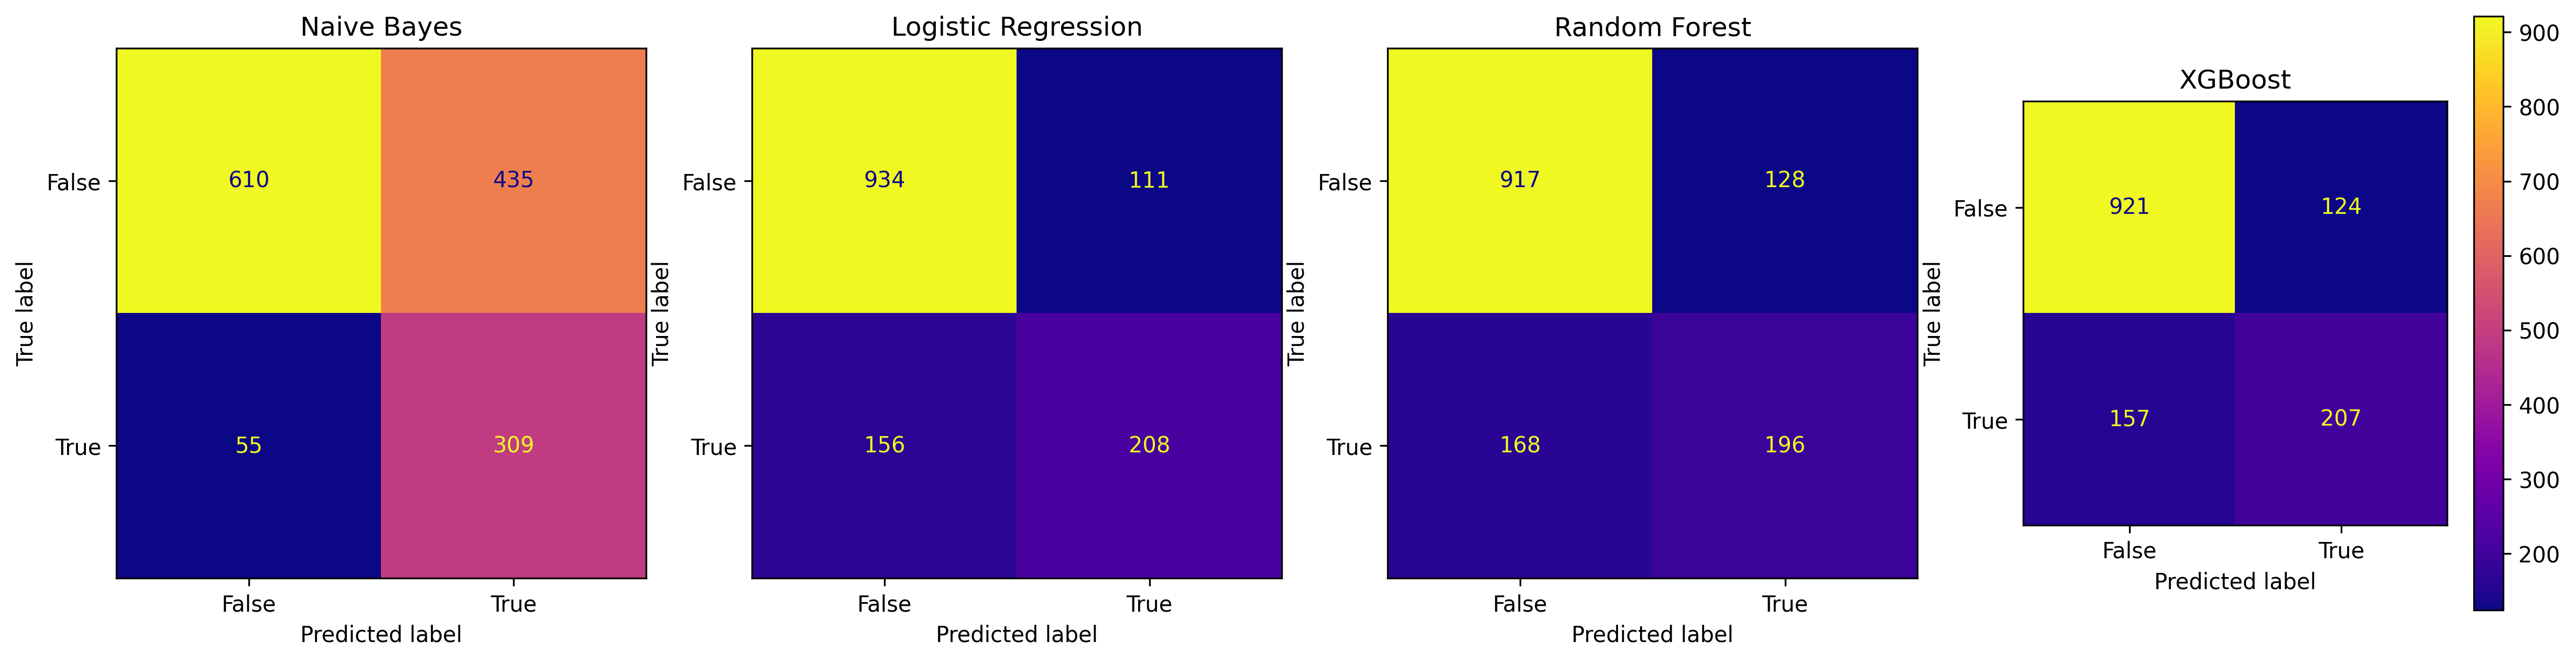

In [25]:
# comparing confusion matrices for this stage of analysis
x_labels = final_results_no_smote['method']
indices = np.arange(len(x_labels))

fig, ax = plt.subplots(1,4,sharex=True, sharey=False, figsize=(20, 5), dpi=300)
ax[0].set_title(x_labels[0])
ax[1].set_title(x_labels[1])
ax[2].set_title(x_labels[2])
ax[3].set_title(x_labels[3])

ConfusionMatrixDisplay(nb_confusion,display_labels=[False,True]).plot(ax=ax[0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(lr_confusion,display_labels=[False,True]).plot(ax=ax[1],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(rf_confusion,display_labels=[False,True]).plot(ax=ax[2],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(xgb_confusion,display_labels=[False,True]).plot(ax=ax[3],cmap='plasma',colorbar=True)
fig.show()

We see that for this stage of analysis, the Naive Bayes model has the most varied confusion matrix, in terms of negatives and positives, however it has the smallest number of True Negatives, compared to the other three models. The other three models have consistent (with each other) proportions of Negatives and Positives.

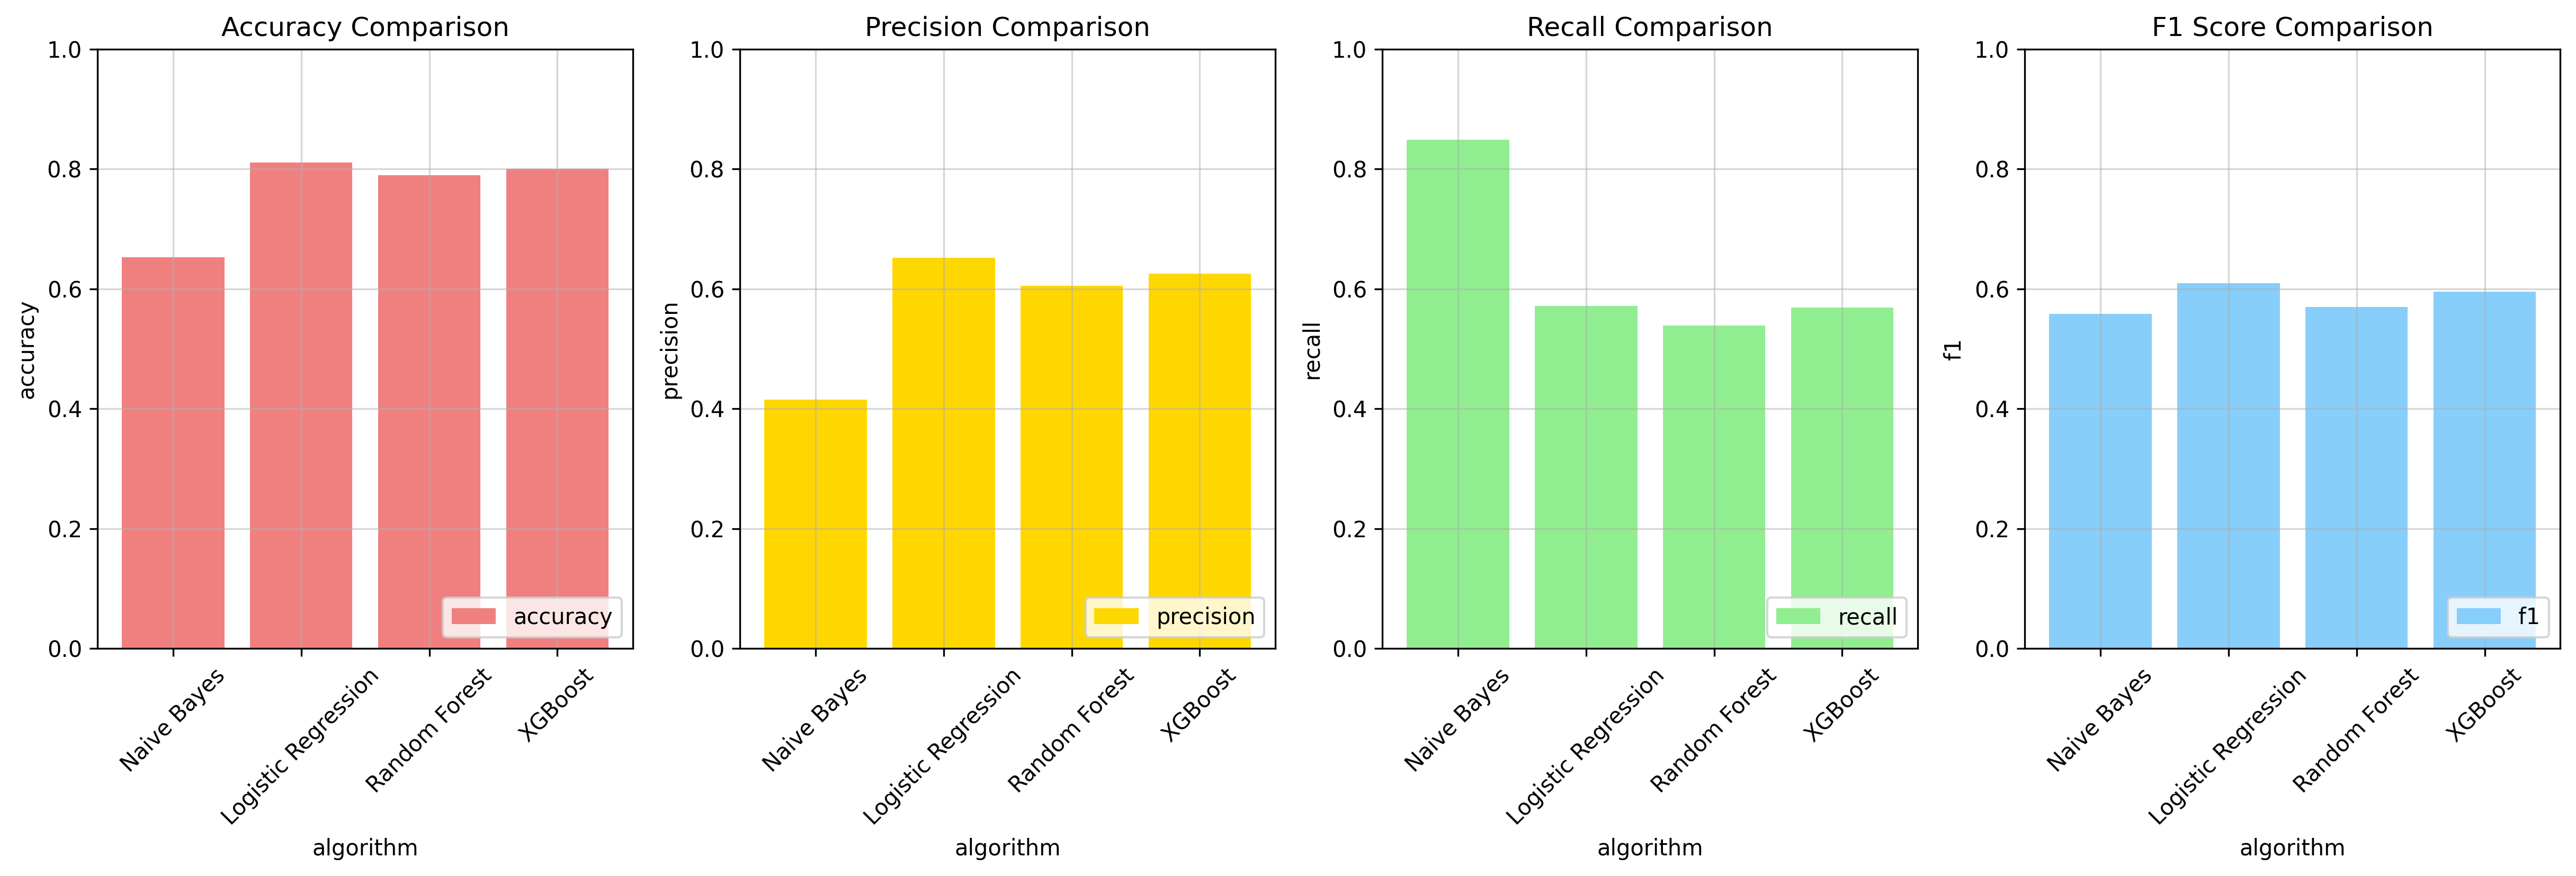

In [26]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = final_results_no_smote['method']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,final_results_no_smote['accuracy'],color="lightcoral",alpha=1,label="accuracy") 
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,final_results_no_smote['precision'],color="gold",alpha=1,label="precision") 
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,final_results_no_smote['recall'],color="lightgreen",alpha=1,label="recall") 
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,final_results_no_smote['f1'],color="lightskyblue",alpha=1,label="f1") 
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

We see that for this stage of analysis, the Naive Bayes classifier has the highest recall. Since we are concerned with the recall metric, in this case, the Naive Bayes classfier is the best algorithm for predicting churn in this dataset.

## Stage Two of Analysis - Predictions using SMOTE

We will now repeat the same process as above, i.e. training the dataset using the four algorithms, and generating predictions for customer churn. However, this time, we will use SMOTE (Synthetic Minority Oversampling TechniquE) methodology. This method deals with imbalances in the dataset in regards to classification labels. Normally, due to the class imbalance, the majority class will have better performance than the minority class. SMOTE deals with this by oversampling the minority class.

In [27]:
X = df.drop(['customerID','Churn'],axis=1)
Y = df['Churn']
# splitting the data into an 80% training/20% testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [28]:
# implementing the SMOTE method
sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_train, Y_train)

### Naive Bayes (SMOTE)

In [29]:
# naive bayes
nb_smote = GaussianNB()
nb_smote.fit(X_res, Y_res)
nb_smote_predictions = nb_smote.predict(X_test)

In [30]:
nb_smote_accuracy_score = accuracy_score(Y_test,nb_smote_predictions)
nb_smote_precision_score = precision_score(Y_test,nb_smote_predictions)
nb_smote_recall_score = recall_score(Y_test,nb_smote_predictions)
nb_smote_f1_score = f1_score(Y_test,nb_smote_predictions)
nb_smote_confusion = confusion_matrix(Y_test,nb_smote_predictions)

In [31]:
final_results_smote.loc[len(final_results_smote)] = ["Naive Bayes",nb_smote_accuracy_score,nb_smote_precision_score,nb_smote_recall_score,nb_smote_f1_score]

### Logistic Regression (SMOTE)

In [32]:
lr_smote = LogisticRegression(random_state=0)
lr_smote.fit(X_res, Y_res)
lr_smote_predictions = lr_smote.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
lr_smote_accuracy_score = accuracy_score(Y_test,lr_smote_predictions)
lr_smote_precision_score = precision_score(Y_test,lr_smote_predictions)
lr_smote_recall_score = recall_score(Y_test,lr_smote_predictions)
lr_smote_f1_score = f1_score(Y_test,lr_smote_predictions)
lr_smote_confusion = confusion_matrix(Y_test,lr_smote_predictions)

In [34]:
final_results_smote.loc[len(final_results_smote)] = ["Logistic Regression",lr_smote_accuracy_score,lr_smote_precision_score,lr_smote_recall_score,lr_smote_f1_score]

### Random Forest (SMOTE)

In [35]:
rf_smote = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_smote.fit(X_res, Y_res)
rf_smote_predictions = rf_smote.predict(X_test)
rf_smote_predictions = [int(x) for x in np.round(rf_smote_predictions,0)]

In [36]:
rf_smote_accuracy_score = accuracy_score(Y_test,rf_smote_predictions)
rf_smote_precision_score = precision_score(Y_test,rf_smote_predictions)
rf_smote_recall_score = recall_score(Y_test,rf_smote_predictions)
rf_smote_f1_score = f1_score(Y_test,rf_smote_predictions)
rf_smote_confusion = confusion_matrix(Y_test,rf_smote_predictions)

In [37]:
final_results_smote.loc[len(final_results_smote)] = ["Random Forest",rf_smote_accuracy_score,rf_smote_precision_score,rf_smote_recall_score,rf_smote_f1_score]

### XGB Boost (SMOTE)

In [38]:
xgb_smote = xgb.XGBClassifier()
xgb_smote.fit(X_res, Y_res)
xgb_smote_predictions = xgb_smote.predict(X_test)

In [39]:
xgb_smote_accuracy_score = accuracy_score(Y_test,xgb_smote_predictions)
xgb_smote_precision_score = precision_score(Y_test,xgb_smote_predictions)
xgb_smote_recall_score = recall_score(Y_test,xgb_smote_predictions)
xgb_smote_f1_score = f1_score(Y_test,xgb_smote_predictions)
xgb_smote_confusion = confusion_matrix(Y_test,xgb_smote_predictions)

In [40]:
final_results_smote.loc[len(final_results_smote)] = ["XGBoost",xgb_smote_accuracy_score,xgb_smote_precision_score,xgb_smote_recall_score,xgb_smote_f1_score]

### Comparing Results for Stage Two of Analysis

Now that we have built all four models for this stage of analysis (SMOTE), we will compare the metrics of these models.

In [41]:
# examining data table for this stage of analysis
final_results_smote

,method,accuracy,precision,recall,f1
0,Naive Bayes,0.668559,0.427567,0.835165,0.565581
1,Logistic Regression,0.740241,0.498148,0.739011,0.595133
2,Random Forest,0.777147,0.561576,0.626374,0.592208
3,XGBoost,0.761533,0.534653,0.593407,0.562500


/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_53574/614623919.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


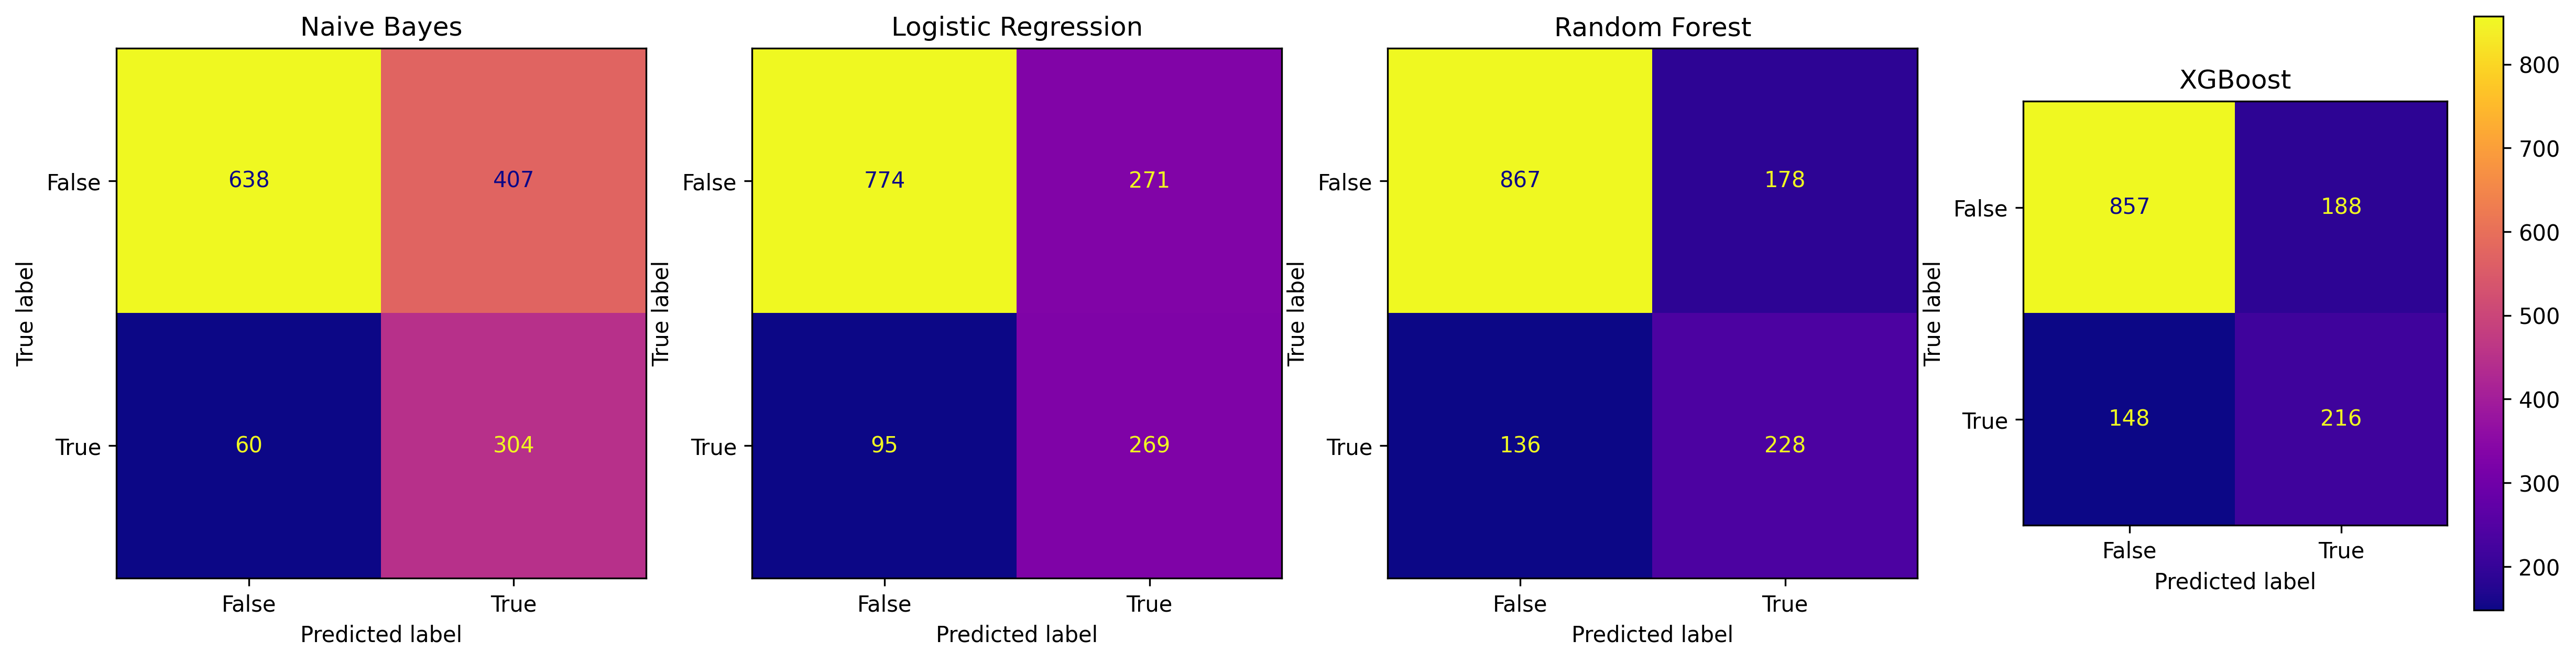

In [42]:
# comparing confusion matrices for this stage of analysis
fig, ax = plt.subplots(1,4,sharex=False, sharey=False, figsize=(20, 5), dpi=300)
ax[0].set_title(x_labels[0])
ax[1].set_title(x_labels[1])
ax[2].set_title(x_labels[2])
ax[3].set_title(x_labels[3])

ConfusionMatrixDisplay(nb_smote_confusion,display_labels=[False,True]).plot(ax=ax[0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(lr_smote_confusion,display_labels=[False,True]).plot(ax=ax[1],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(rf_smote_confusion,display_labels=[False,True]).plot(ax=ax[2],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(xgb_smote_confusion,display_labels=[False,True]).plot(ax=ax[3],cmap='plasma',colorbar=True)
fig.show()

We find that Naive Bayes has the most varied confusion matrix, but has the least number of True Negatives. The other three models have similar proportions to each other in terms of Negatives and Postives.

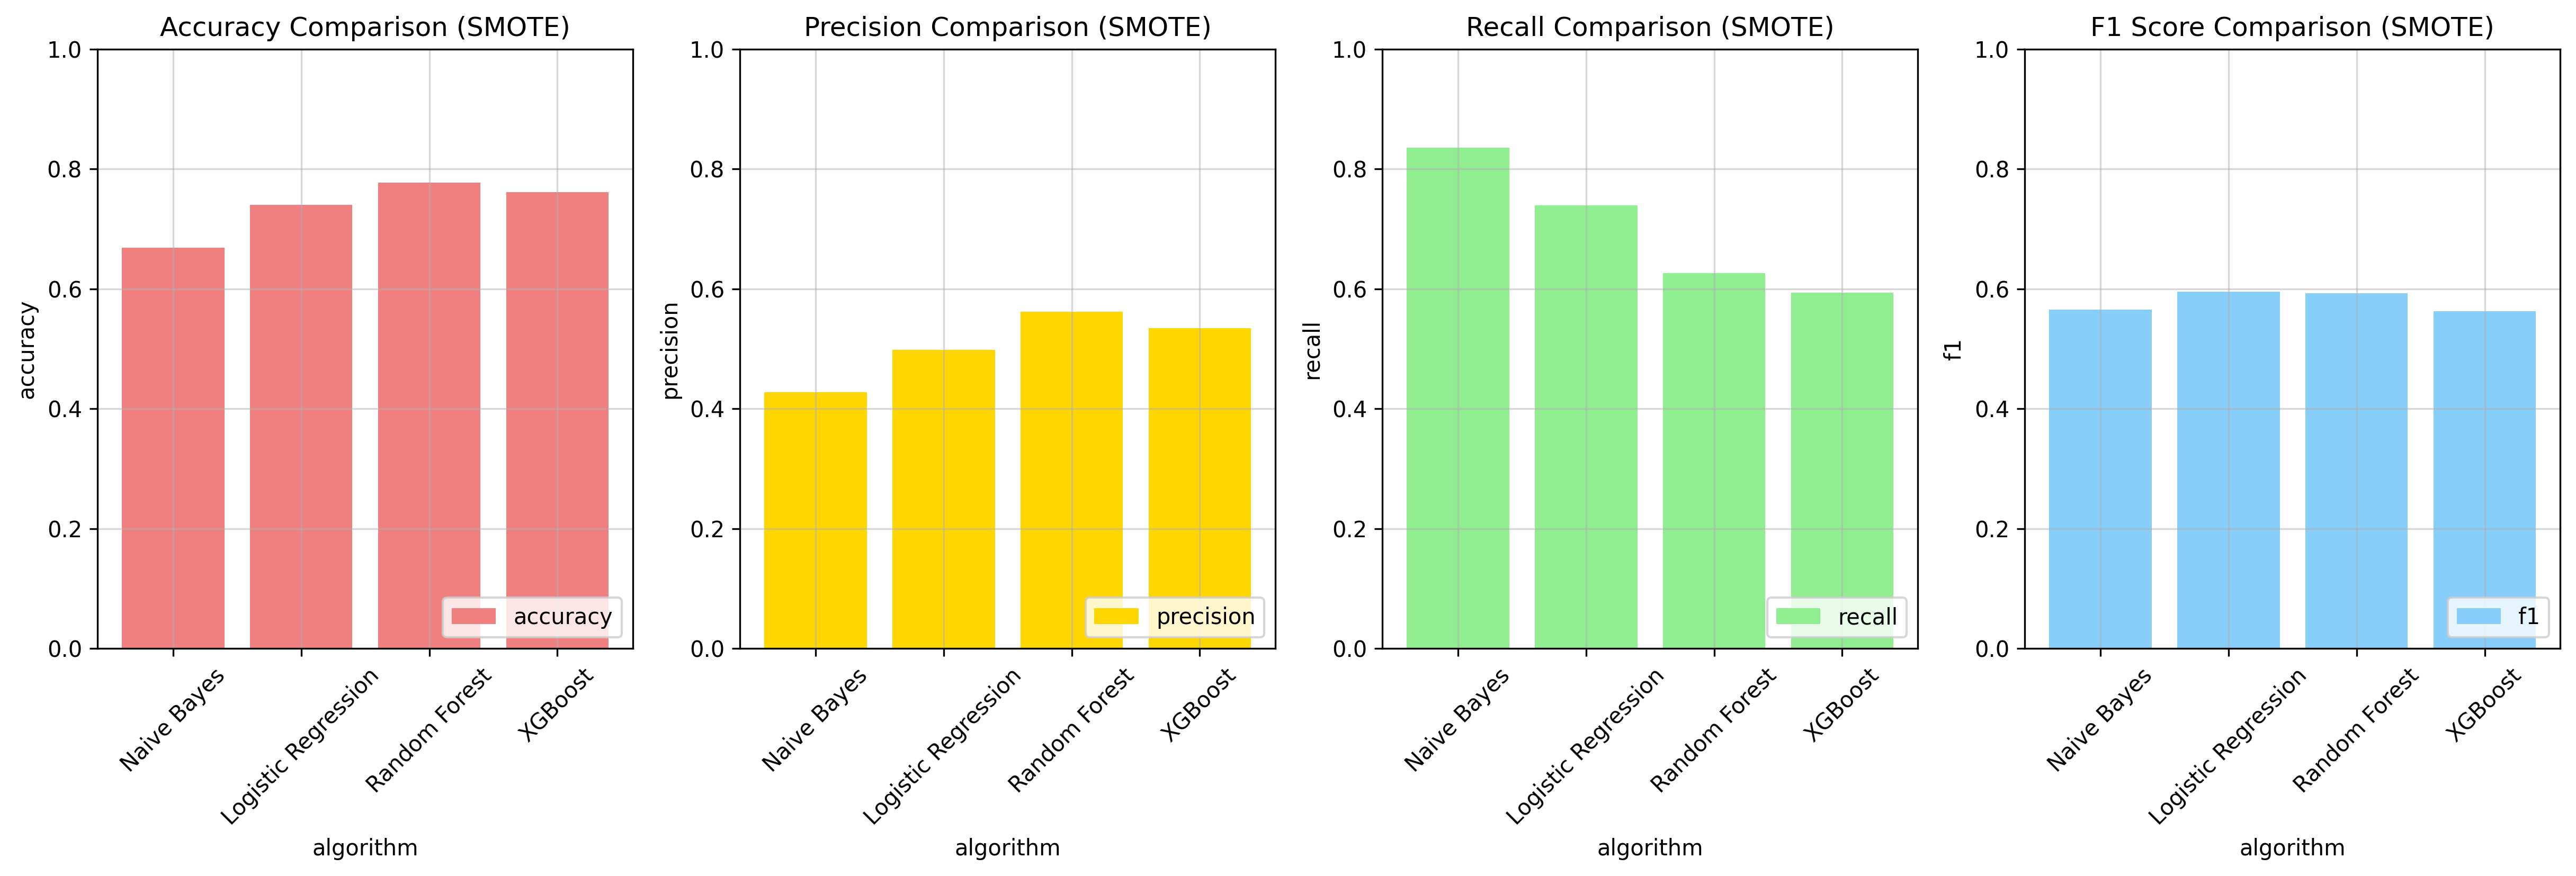

In [43]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = final_results_smote['method']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,final_results_smote['accuracy'],color="lightcoral",alpha=1,label="accuracy") 
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison (SMOTE)")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,final_results_smote['precision'],color="gold",alpha=1,label="precision") 
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison (SMOTE)")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,final_results_smote['recall'],color="lightgreen",alpha=1,label="recall") 
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison (SMOTE)")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,final_results_smote['f1'],color="lightskyblue",alpha=1,label="f1") 
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison (SMOTE)")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

In terms of recall, we find that the Naive Bayes method provides the best set of predictions of customer churn, compared to the other models. 

## Stage Three of Analysis - Predictions using Hyperparameter Tuning (only for Random Forests and XGBoost)

### Random Forests - Hyperparameter Tuning

We will start by getting the current parameters for the Random Forest model (no SMOTE) that we obtained earlier.

In [44]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [45]:
# estimating the parameters
est_rf_params = {
    'n_estimators':np.arange(10,1000,10),
    'max_features':['auto','sqrt'],
    'max_depth':np.arange(1,11,1),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True]
}

In [46]:
# using estimated parameter grid and doing RandomizedSearchCV before fitting
est_rf_hyp_model = RandomForestRegressor(random_state = 42)
est_rf_hyp = RandomizedSearchCV(est_rf_hyp_model,est_rf_params,n_iter=10,cv=3,n_jobs=-1)
est_rf_hyp.fit(X_train, Y_train)
est_rf_hyp_predictions = est_rf_hyp.predict(X_test)
est_rf_hyp_predictions = [int(x) for x in np.round(est_rf_hyp_predictions,0)];

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

In [47]:
est_rf_hyp_accuracy_score = accuracy_score(Y_test,est_rf_hyp_predictions)
est_rf_hyp_precision_score = precision_score(Y_test,est_rf_hyp_predictions)
est_rf_hyp_recall_score = recall_score(Y_test,est_rf_hyp_predictions)
est_rf_hyp_f1_score = f1_score(Y_test,est_rf_hyp_predictions)
est_rf_hyp_confusion = confusion_matrix(Y_test,est_rf_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["Random Forest - RandomizedSearchCV",est_rf_hyp_accuracy_score,est_rf_hyp_precision_score,est_rf_hyp_recall_score,est_rf_hyp_f1_score]

We have obtained a first set of best hyperparameters using the RandomizedSearchCV method, which search randomly from the parameter space to obtain the best-fitting parameters. We will now pass these obtained parameters again into the model, but this time use the GridSearchCV method to see if they can be further optimized.

In [48]:
# getting obtained best paramters from RandomizedSearchCV
rf_hyp_params = est_rf_hyp.best_params_
print(rf_hyp_params)

{'n_estimators': 680, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 9, 'bootstrap': True}


In [49]:
# converting these parameters to be read
rf_hyp_param_values = {}
for key, value in rf_hyp_params.items():
    rf_hyp_param_values[key] = [value]
print(rf_hyp_param_values)

{'n_estimators': [680], 'min_samples_split': [2], 'min_samples_leaf': [4], 'max_features': ['sqrt'], 'max_depth': [9], 'bootstrap': [True]}


In [50]:
# using obtained best parameters and doing GridSearchCV before fitting
rf_hyp_model = RandomForestRegressor(random_state = 42)
rf_hyp = GridSearchCV(rf_hyp_model,rf_hyp_param_values,cv=3,n_jobs=-1)
rf_hyp.fit(X_train, Y_train)
rf_hyp_predictions = rf_hyp.predict(X_test)
rf_hyp_predictions = [int(x) for x in np.round(rf_hyp_predictions,0)]

In [51]:
rf_hyp_accuracy_score = accuracy_score(Y_test,rf_hyp_predictions)
rf_hyp_precision_score = precision_score(Y_test,rf_hyp_predictions)
rf_hyp_recall_score = recall_score(Y_test,rf_hyp_predictions)
rf_hyp_f1_score = f1_score(Y_test,rf_hyp_predictions)
rf_hyp_confusion = confusion_matrix(Y_test,rf_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["Random Forest - GridSearchCV",rf_hyp_accuracy_score,rf_hyp_precision_score,rf_hyp_recall_score,rf_hyp_f1_score]

### XGBoost - Hyperparameter Tuning

We repeat the same hyperparameter tuning process as before.

In [52]:
# estimating the parameters
est_xgb_params = {
    'n_estimators':np.arange(10,1000,10),
    'max_features':['auto','sqrt'],
    'max_depth':np.arange(1,11,1),
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True]
}

In [53]:
# using estimated parameter grid and doing RandomizedSearchCV before fitting
est_xgb_hyp_model = RandomForestRegressor(random_state = 42)
est_xgb_hyp = RandomizedSearchCV(est_xgb_hyp_model,est_xgb_params,n_iter=10,cv=3,n_jobs=-1)
est_xgb_hyp.fit(X_train, Y_train)
est_xgb_hyp_predictions = est_xgb_hyp.predict(X_test)
est_xgb_hyp_predictions = [int(x) for x in np.round(est_xgb_hyp_predictions,0)];

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

In [54]:
est_xgb_hyp_accuracy_score = accuracy_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_precision_score = precision_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_recall_score = recall_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_f1_score = f1_score(Y_test,est_xgb_hyp_predictions)
est_xgb_hyp_confusion = confusion_matrix(Y_test,est_xgb_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["XGBoost - RandomizedSearchCV",est_xgb_hyp_accuracy_score,est_xgb_hyp_precision_score,est_xgb_hyp_recall_score,est_xgb_hyp_f1_score]

In [55]:
# getting obtained best paramters from RandomizedSearchCV
xgb_hyp_params = est_xgb_hyp.best_params_
print(xgb_hyp_params)

{'n_estimators': 530, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 8, 'bootstrap': True}


In [56]:
# converting these parameters to be read
xgb_hyp_param_values = {}
for key, value in xgb_hyp_params.items():
    xgb_hyp_param_values[key] = [value]
print(xgb_hyp_param_values)

{'n_estimators': [530], 'min_samples_split': [2], 'min_samples_leaf': [2], 'max_features': ['sqrt'], 'max_depth': [8], 'bootstrap': [True]}


In [57]:
# using obtained best parameters and doing GridSearchCV before fitting
xgb_hyp_model = RandomForestRegressor(random_state = 42)
xgb_hyp = GridSearchCV(xgb_hyp_model,xgb_hyp_param_values,cv=3,n_jobs=-1)
xgb_hyp.fit(X_train, Y_train)
xgb_hyp_predictions = xgb_hyp.predict(X_test)
xgb_hyp_predictions = [int(x) for x in np.round(xgb_hyp_predictions,0)];

In [58]:
xgb_hyp_accuracy_score = accuracy_score(Y_test,xgb_hyp_predictions)
xgb_hyp_precision_score = precision_score(Y_test,xgb_hyp_predictions)
xgb_hyp_recall_score = recall_score(Y_test,xgb_hyp_predictions)
xgb_hyp_f1_score = f1_score(Y_test,xgb_hyp_predictions)
xgb_hyp_confusion = confusion_matrix(Y_test,xgb_hyp_predictions)
final_results_hyp.loc[len(final_results_hyp)] = ["XGBoost - GridSearchCV",xgb_hyp_accuracy_score,xgb_hyp_precision_score,xgb_hyp_recall_score,xgb_hyp_f1_score]

### Comparing Results (Hyperparameter Tuning)

In [59]:
# examining data table for this stage of analysis
final_results_hyp

,method,accuracy,precision,recall,f1
0,Random Forest - RandomizedSearchCV,0.799148,0.631922,0.532967,0.578241
1,Random Forest - GridSearchCV,0.799148,0.631922,0.532967,0.578241
2,XGBoost - RandomizedSearchCV,0.796309,0.625407,0.527473,0.572280
3,XGBoost - GridSearchCV,0.796309,0.625407,0.527473,0.572280


/var/folders/n9/3mjn__fd1xd66lc1zh9nlj0h0000gp/T/ipykernel_53574/844298503.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


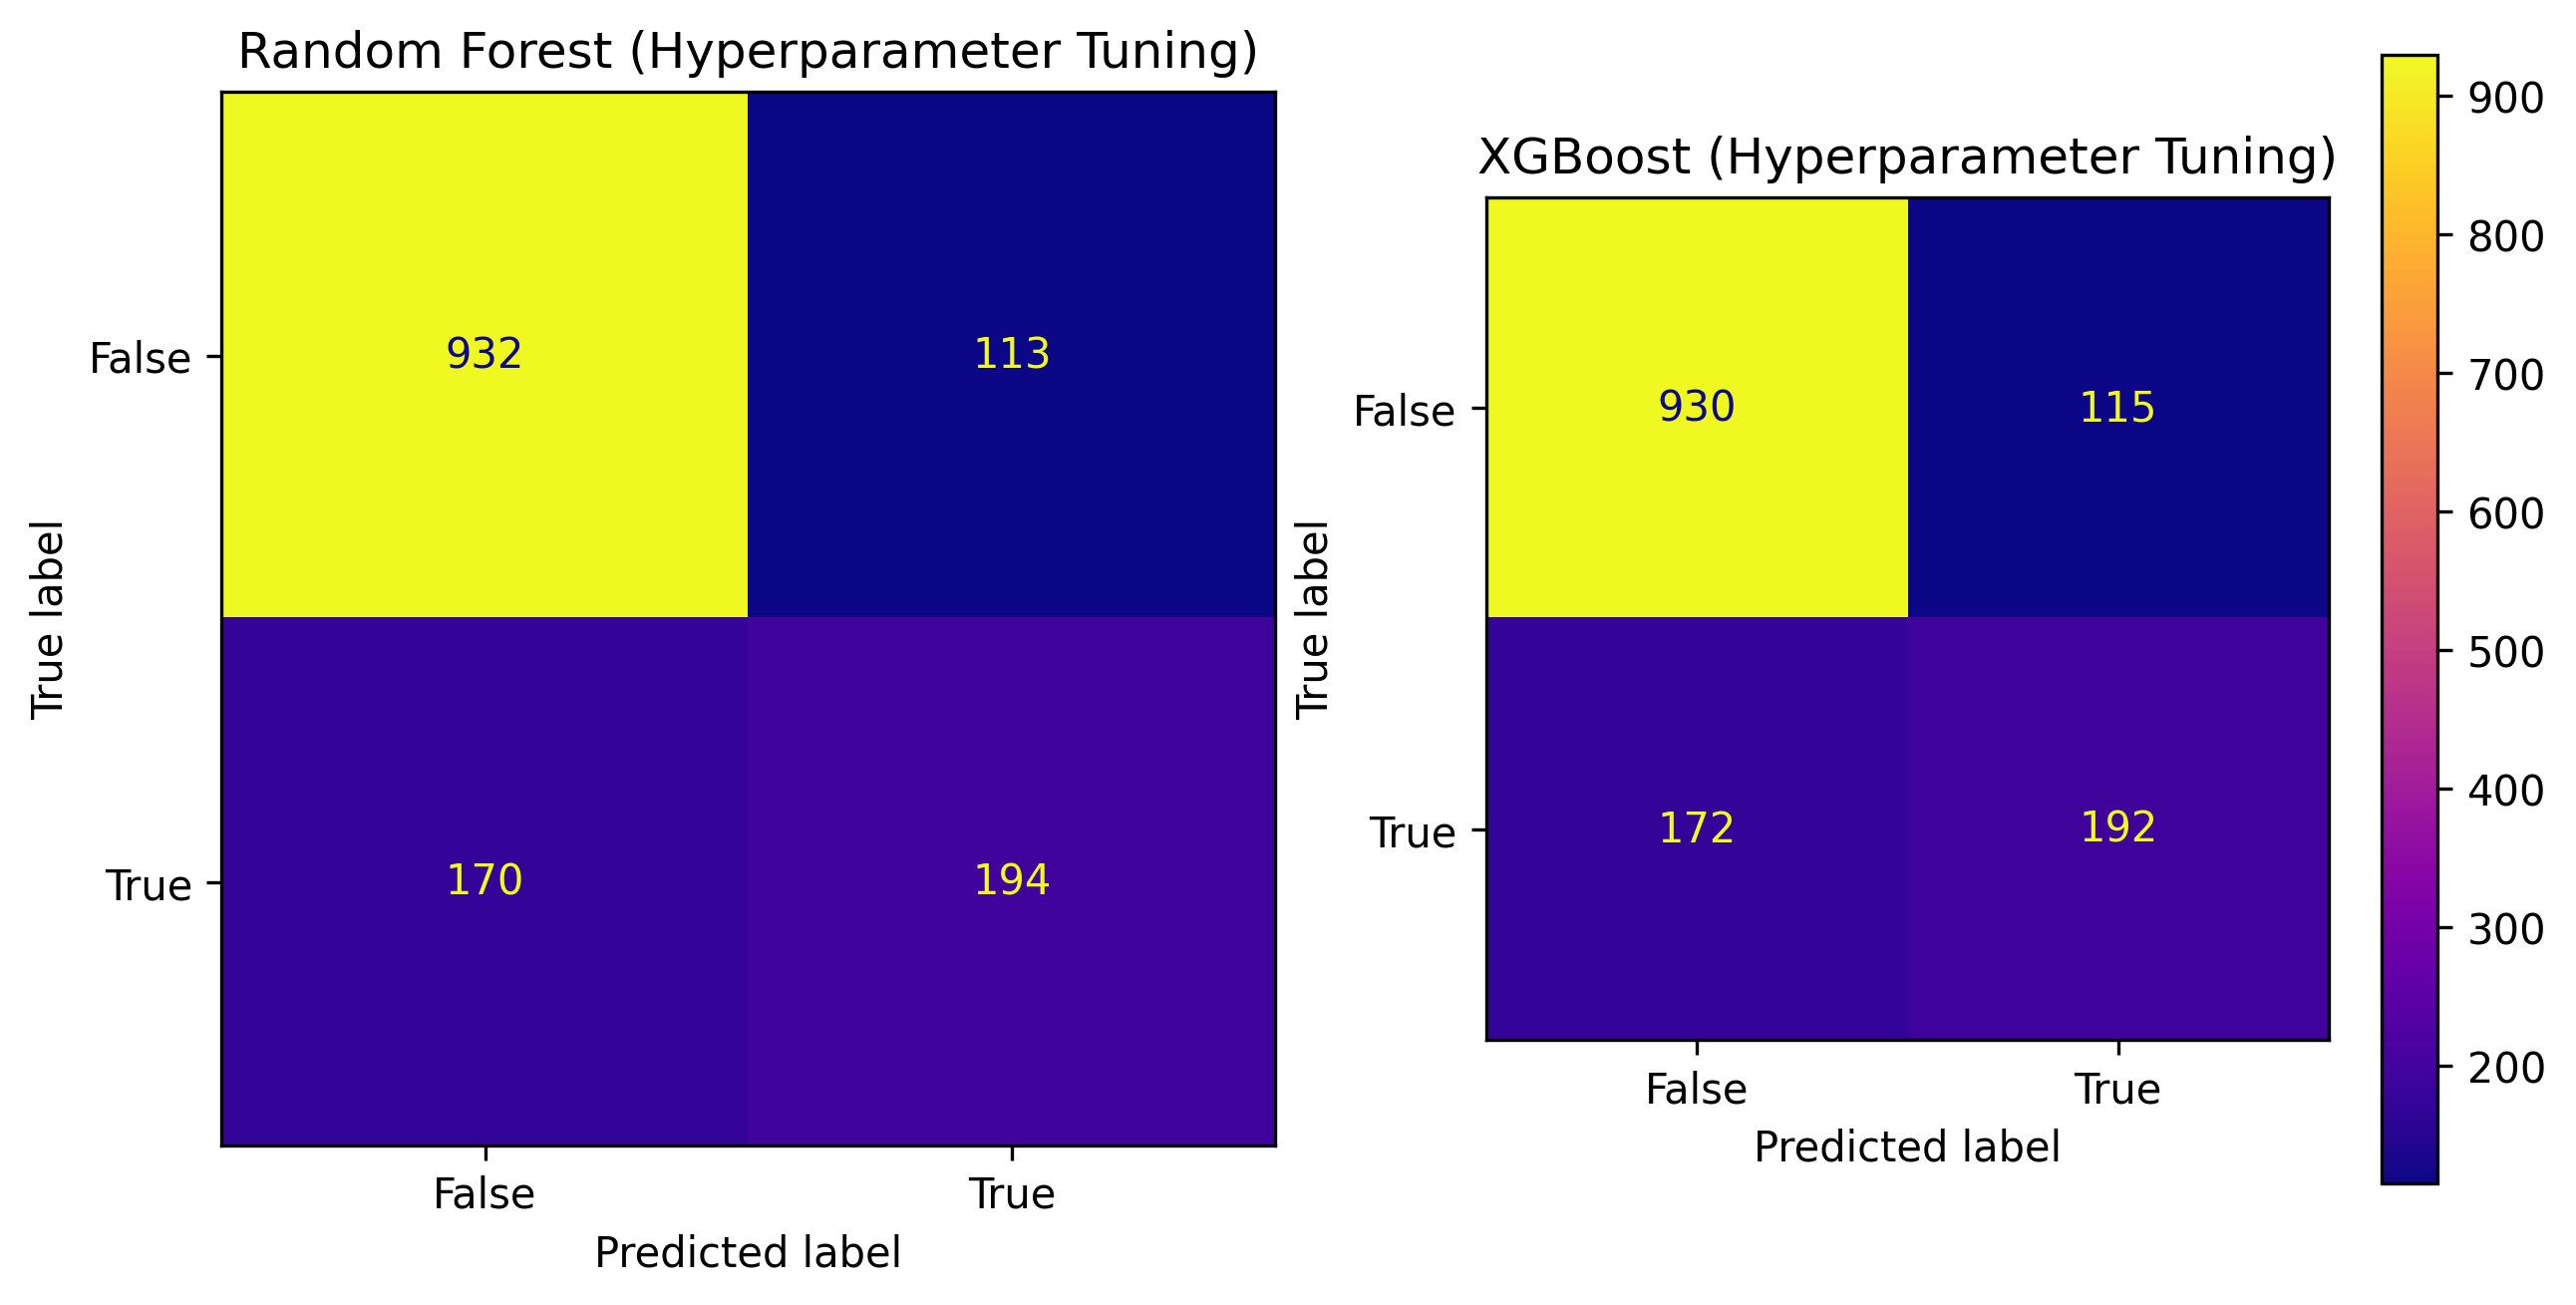

In [60]:
# comparing confusion matrices for this stage of analysis
fig, ax = plt.subplots(1,2,sharex=False, sharey=False, figsize=(10, 5), dpi=300)
ax[0].set_title('Random Forest (Hyperparameter Tuning)')
ax[1].set_title('XGBoost (Hyperparameter Tuning)')

ConfusionMatrixDisplay(rf_hyp_confusion,display_labels=[False,True]).plot(ax=ax[0],cmap='plasma',colorbar=False)
ConfusionMatrixDisplay(xgb_hyp_confusion,display_labels=[False,True]).plot(ax=ax[1],cmap='plasma',colorbar=True)
fig.show()

We find that both models have similar confusion matrices.

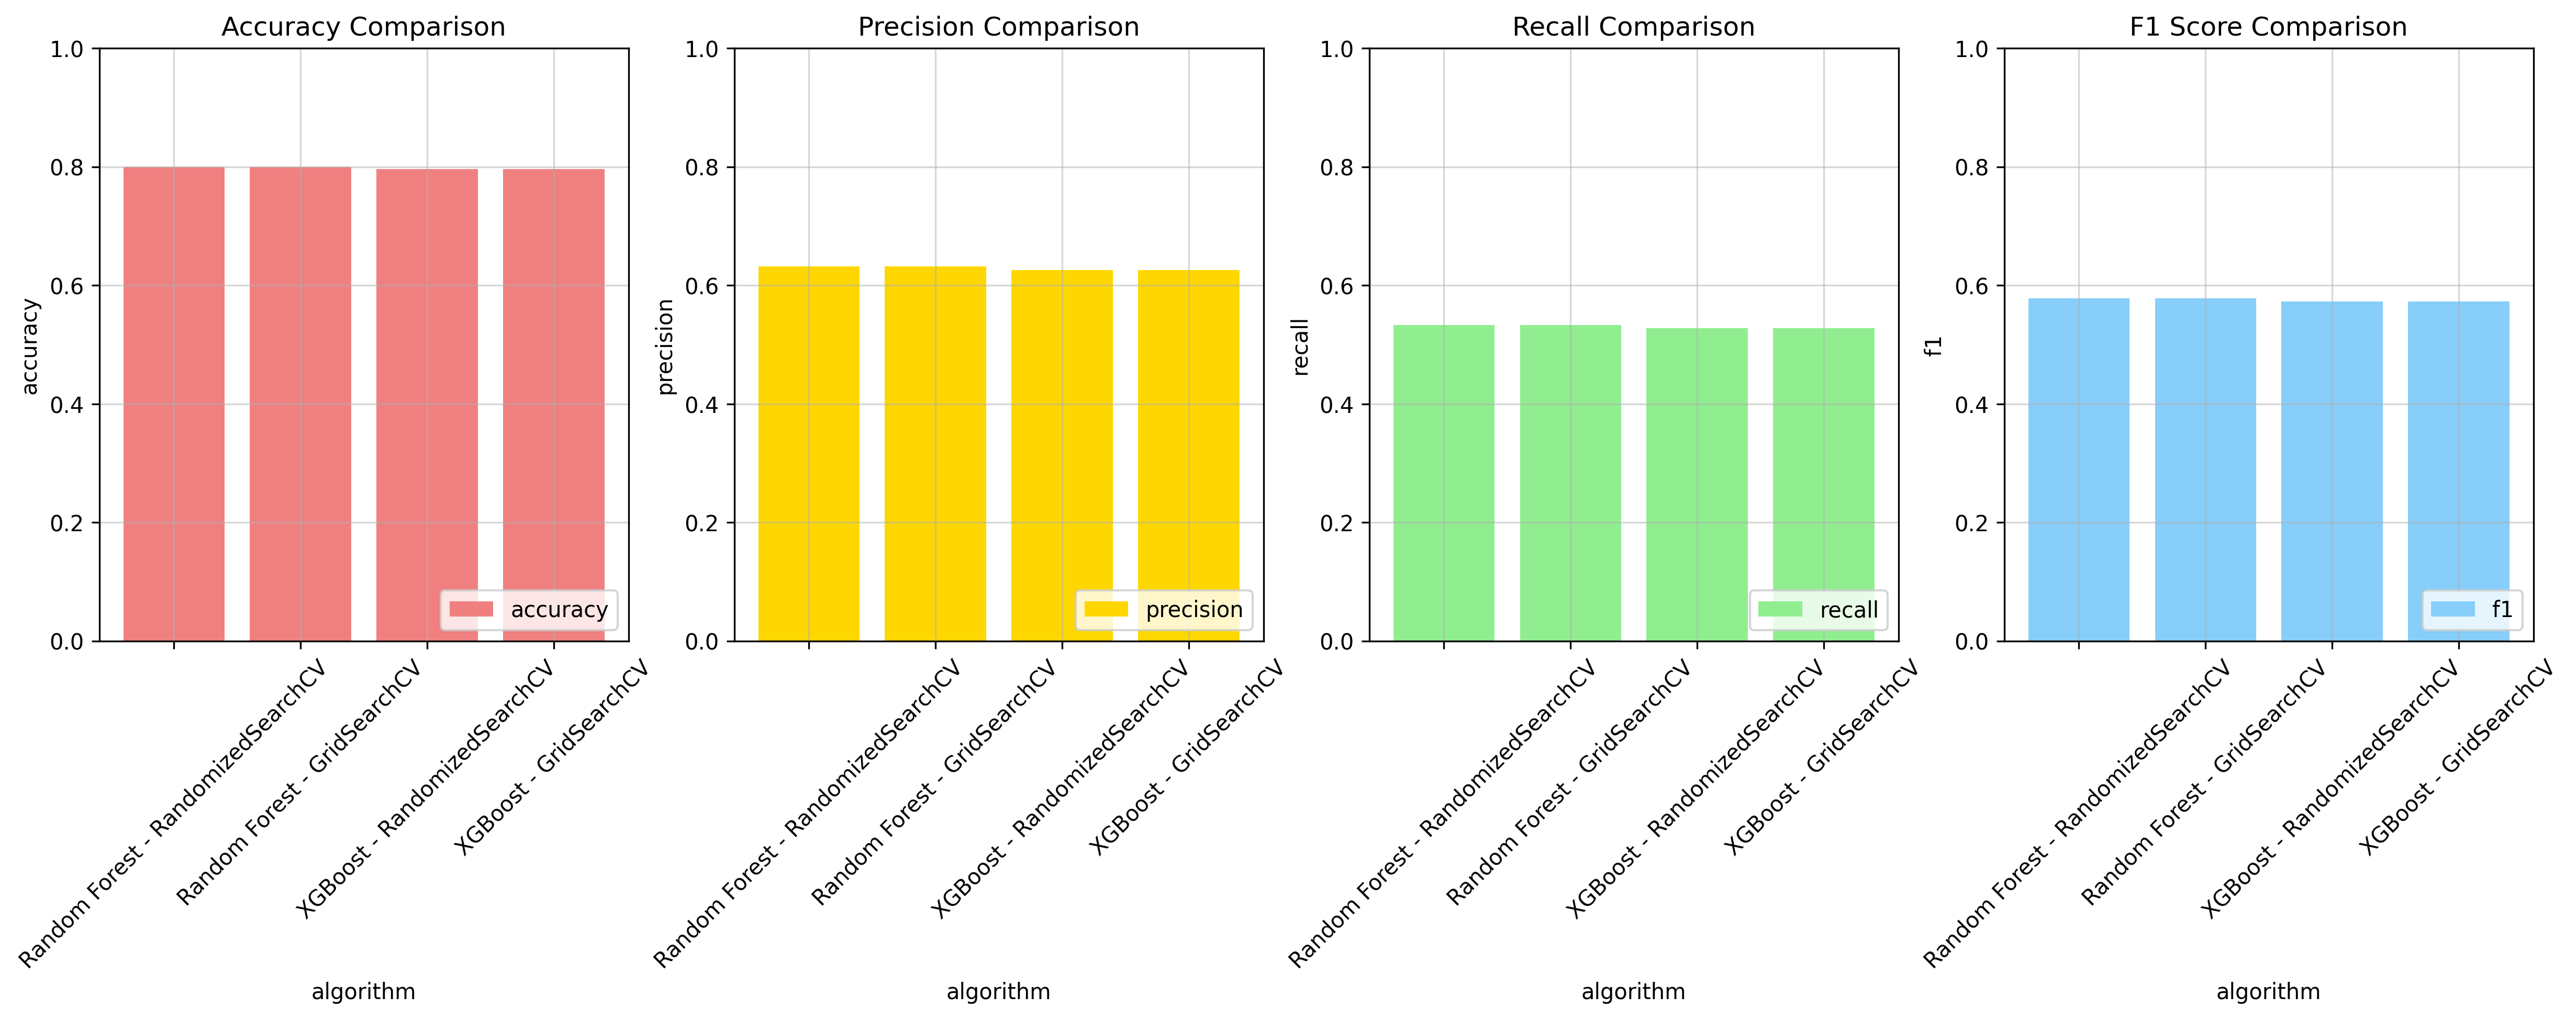

In [61]:
# comparing all metrics for this stage of analysis
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = final_results_hyp['method']
indices = np.arange(len(x_labels))
width = 0.3

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices,final_results_hyp['accuracy'],color="lightcoral",alpha=1,label="accuracy") 
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices,final_results_hyp['precision'],color="gold",alpha=1,label="precision") 
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices,final_results_hyp['recall'],color="lightgreen",alpha=1,label="recall") 
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices,final_results_hyp['f1'],color="lightskyblue",alpha=1,label="f1") 
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices, x_labels, rotation=45)

We find that there is no difference in each of the models' performance when we use RandomizedSearchCV first, and then use the best_params from the result and re-run the model with GridSearchCV model. 

In terms of recall, we find that the Random Forest model performs slightly better than XGBoost. However, both models provide very similar performances compared to each other for each of the 4 metrics.

Now we will compare the results of hyperparameter tuning with the first two stages of analysis - non-SMOTE and SMOTE.

In [62]:
# preparing dataframes for comparing all three stages of analysis
pre_hyp_comparison_no_smote = final_results_no_smote[2:4]
pre_hyp_comparison_smote = final_results_smote[2:4]
post_hyp_comparison = final_results_hyp.iloc[[0,2]]

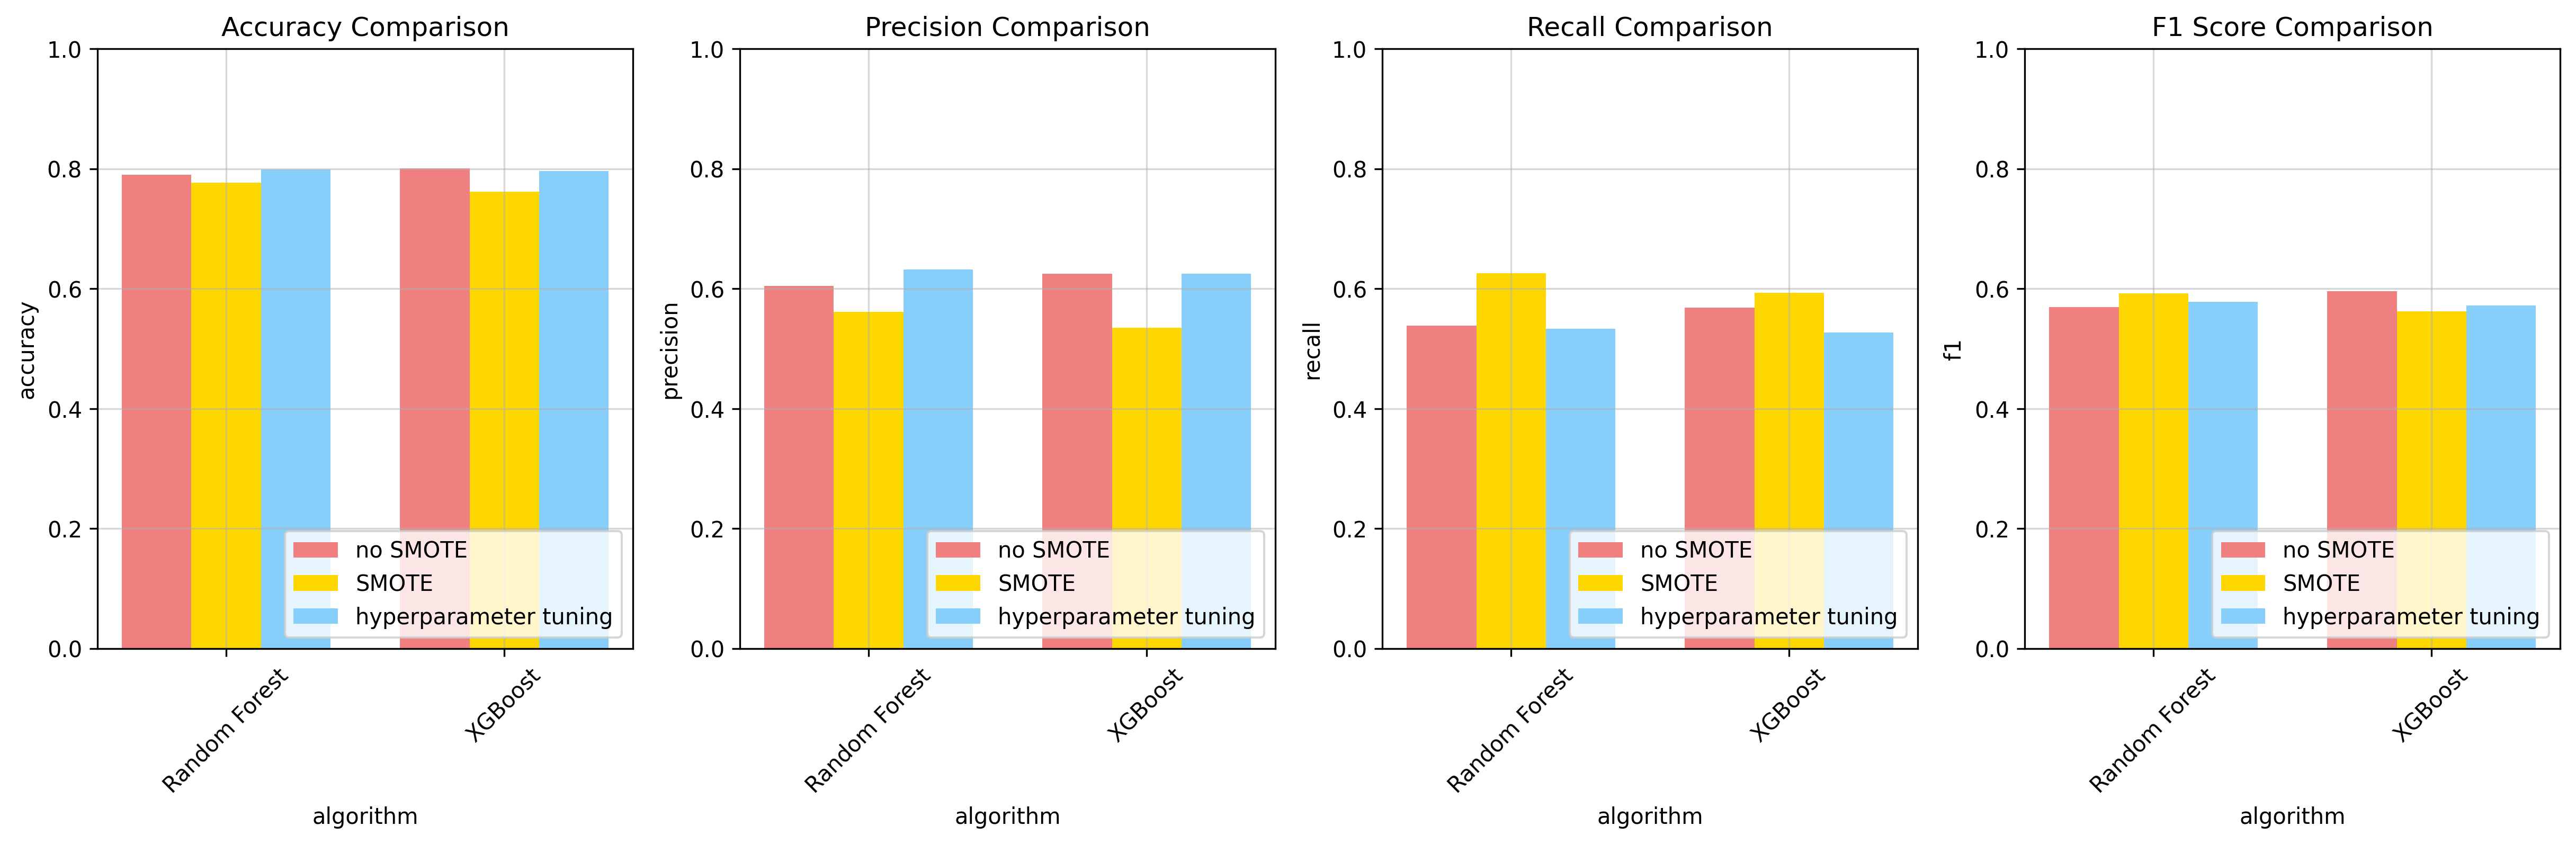

In [63]:
fig, ax = plt.subplots(1, 4, sharex=True, sharey=False, figsize=(20, 5), dpi=300)
x_labels = ['Random Forest','XGBoost']
indices = np.arange(len(x_labels))
width = 0.25

# first row - NO Hyperparameters
#row=0, col=0
ax[0].bar(indices+width,pre_hyp_comparison_no_smote['accuracy'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[0].bar(indices+2*width,pre_hyp_comparison_smote['accuracy'],width,color="gold",alpha=1,label="SMOTE") 
ax[0].bar(indices+3*width,post_hyp_comparison['accuracy'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[0].grid(True,alpha=0.5)
ax[0].set_ylim(0,1)
ax[0].set_xlabel("algorithm")
ax[0].set_ylabel("accuracy")
ax[0].set_title("Accuracy Comparison")
ax[0].legend(loc='lower right')
ax[0].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=1
ax[1].bar(indices+width,pre_hyp_comparison_no_smote['precision'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[1].bar(indices+2*width,pre_hyp_comparison_smote['precision'],width,color="gold",alpha=1,label="SMOTE") 
ax[1].bar(indices+3*width,post_hyp_comparison['precision'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[1].grid(True,alpha=0.5)
ax[1].set_ylim(0,1)
ax[1].set_xlabel("algorithm")
ax[1].set_ylabel("precision")
ax[1].set_title("Precision Comparison")
ax[1].legend(loc='lower right')
ax[1].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=2
ax[2].bar(indices+width,pre_hyp_comparison_no_smote['recall'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[2].bar(indices+2*width,pre_hyp_comparison_smote['recall'],width,color="gold",alpha=1,label="SMOTE") 
ax[2].bar(indices+3*width,post_hyp_comparison['recall'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[2].grid(True,alpha=0.5)
ax[2].set_ylim(0,1)
ax[2].set_xlabel("algorithm")
ax[2].set_ylabel("recall")
ax[2].set_title("Recall Comparison")
ax[2].legend(loc='lower right')
ax[2].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=3
ax[3].bar(indices+width,pre_hyp_comparison_no_smote['f1'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[3].bar(indices+2*width,pre_hyp_comparison_smote['f1'],width,color="gold",alpha=1,label="SMOTE") 
ax[3].bar(indices+3*width,post_hyp_comparison['f1'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[3].grid(True,alpha=0.5)
ax[3].set_ylim(0,1)
ax[3].set_xlabel("algorithm")
ax[3].set_ylabel("f1")
ax[3].set_title("F1 Score Comparison")
ax[3].legend(loc='lower right')
ax[3].set_xticks(indices+2*width, x_labels, rotation=45)

When comparing the results for all three stages of analysis, we see that in terms of recall, SMOTE analysis provided the best results for each of Random Forest and XGBoost models, over the non-SMOTE and hyperparameter tuning methods. 

## Comparison of all Stages of Analysis

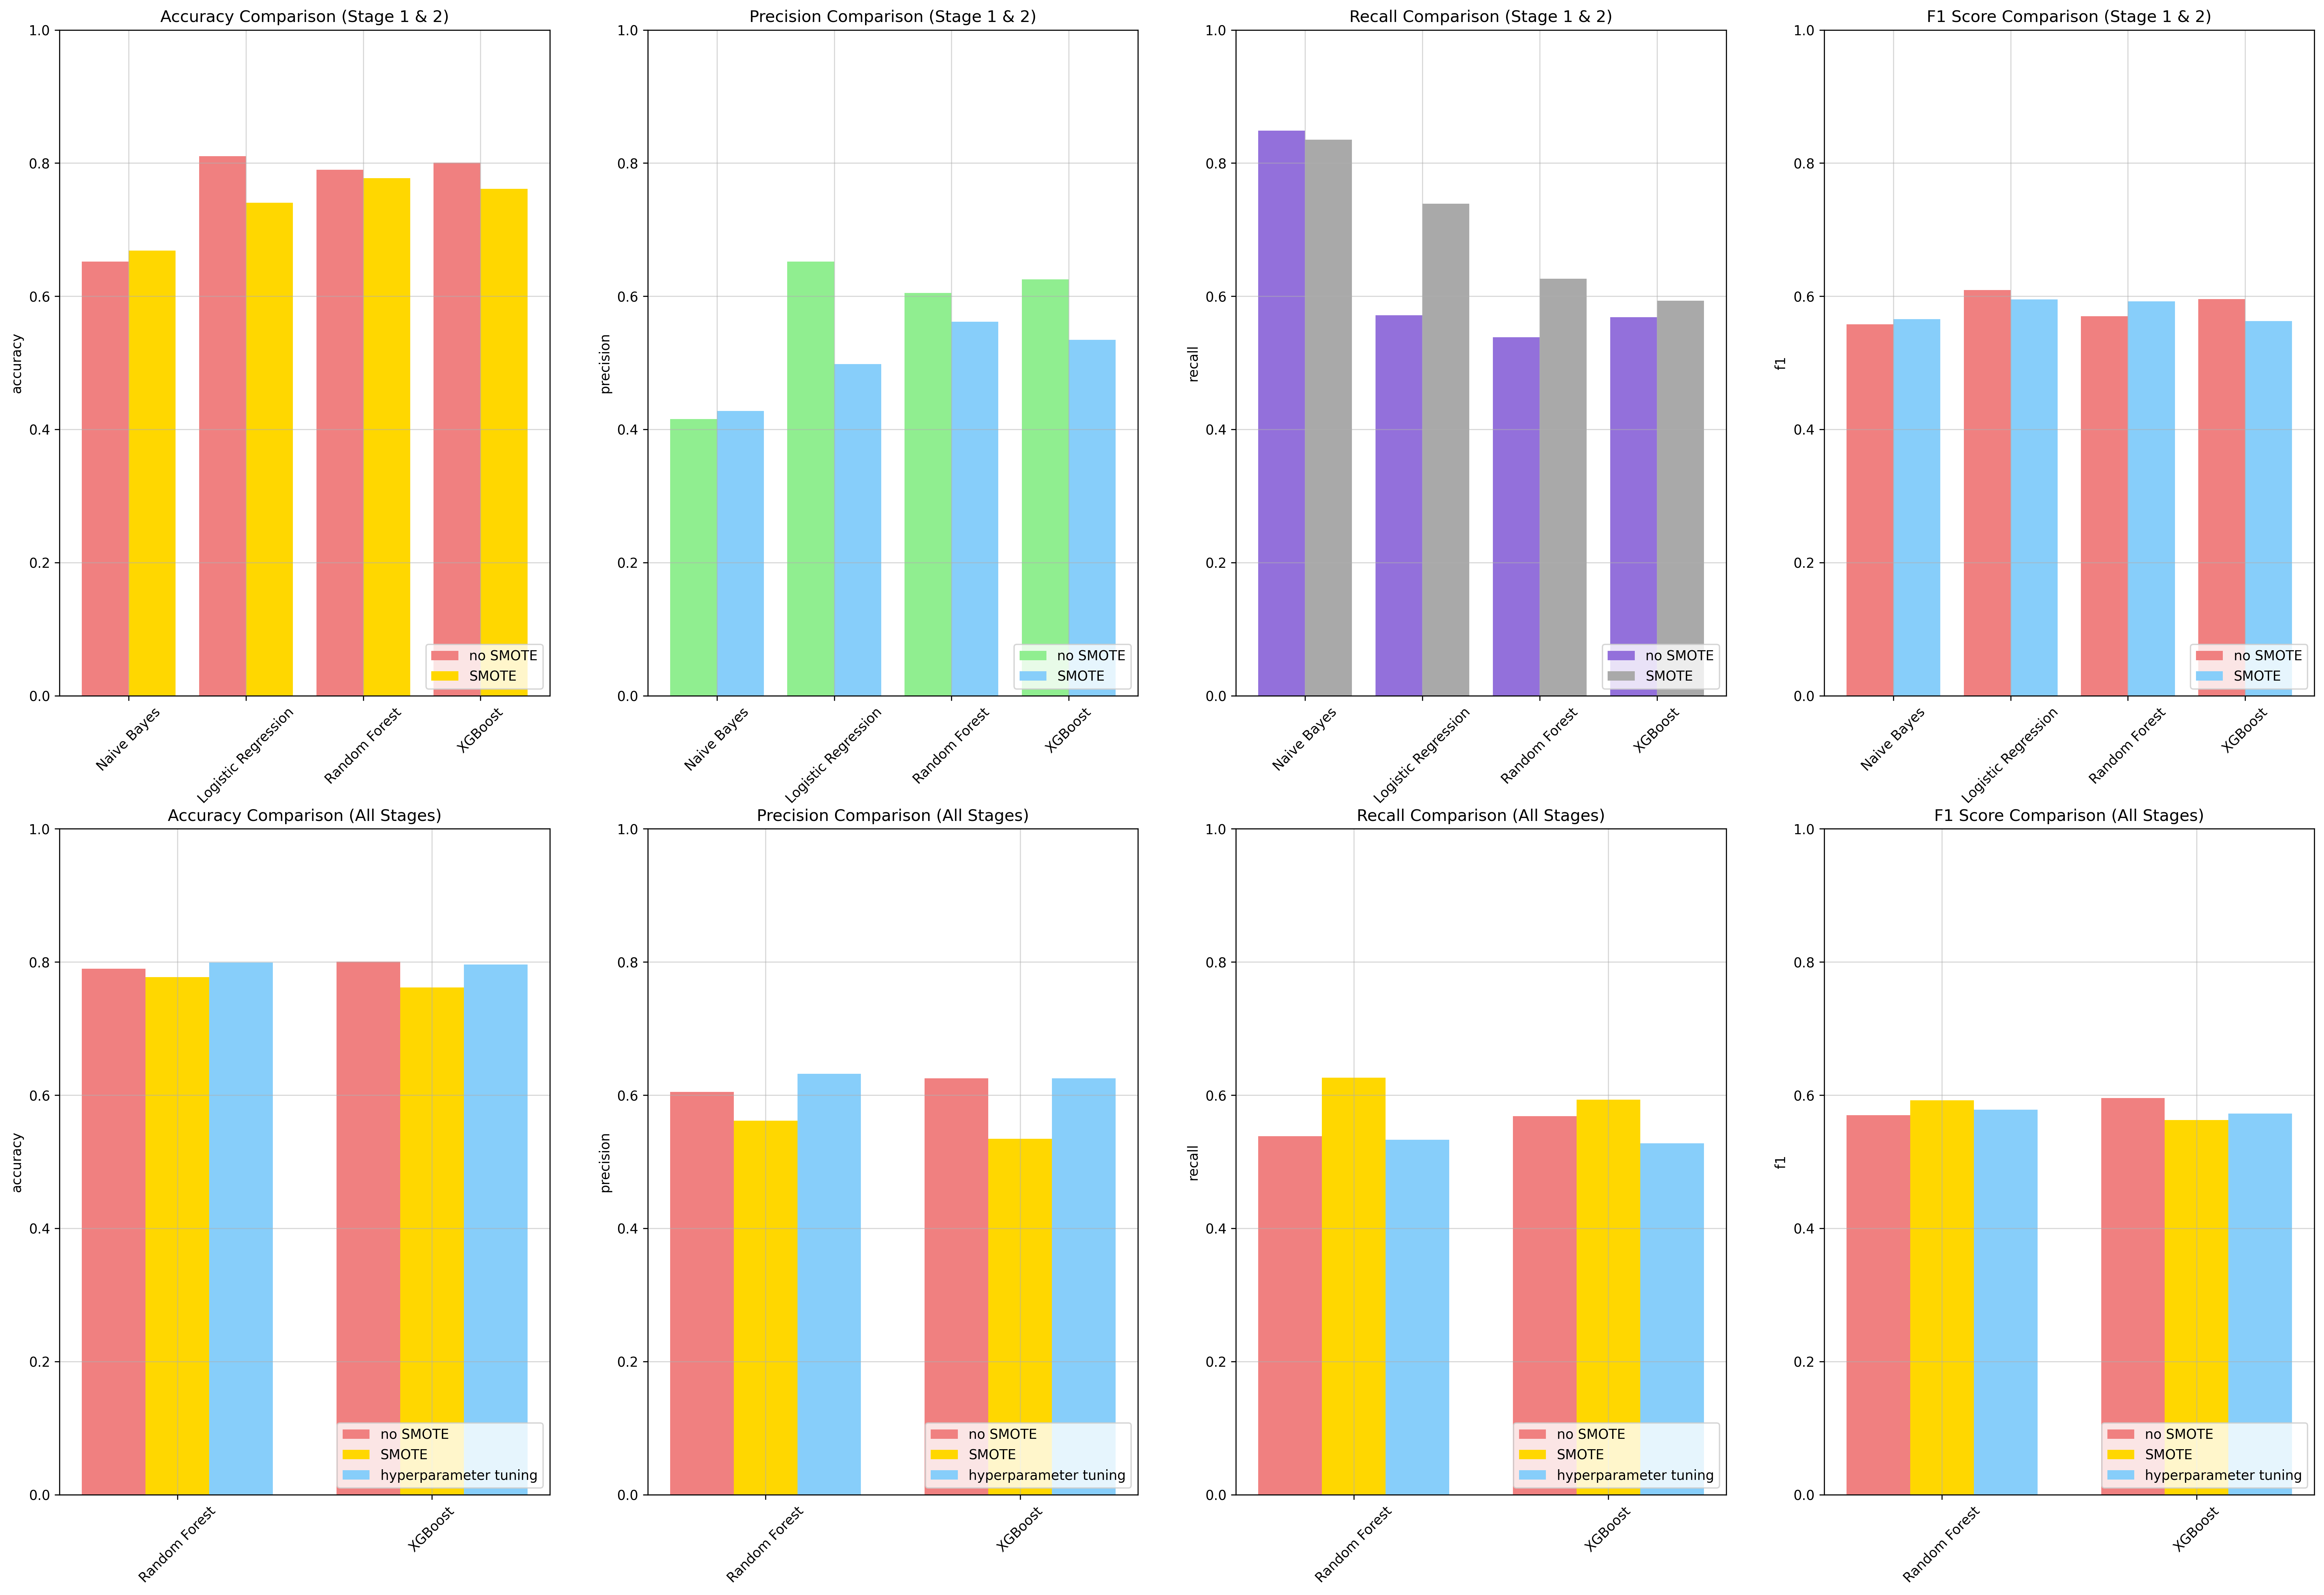

In [64]:
fig, ax = plt.subplots(2, 4, sharex=False, sharey=False, figsize=(30, 20), dpi=300)
x_labels = final_results_no_smote['method']
indices = np.arange(len(x_labels))
width = 0.4

# first row - NO Hyperparameters
#row=0, col=0
ax[0, 0].bar(indices-0.5*width,final_results_no_smote['accuracy'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[0, 0].bar(indices+0.5*width,final_results_smote['accuracy'],width,color="gold",alpha=1,label="SMOTE")
ax[0, 0].grid(True,alpha=0.5)
ax[0, 0].set_ylim(0,1)
# ax[0, 0].set_xlabel("algorithm")
ax[0, 0].set_ylabel("accuracy")
ax[0, 0].set_title("Accuracy Comparison (Stage 1 & 2)")
ax[0, 0].legend(loc='lower right')
ax[0, 0].set_xticks(indices, x_labels, rotation=45)

#row=0, col=1
ax[0, 1].bar(indices-0.5*width,final_results_no_smote['precision'],width,color="lightgreen",alpha=1,label="no SMOTE") 
ax[0, 1].bar(indices+0.5*width,final_results_smote['precision'],width,color="lightskyblue",alpha=1,label="SMOTE")
ax[0, 1].grid(True,alpha=0.5)
ax[0, 1].set_ylim(0,1)
# ax[0, 1].set_xlabel("algorithm")
ax[0, 1].set_ylabel("precision")
ax[0, 1].set_title("Precision Comparison (Stage 1 & 2)")
ax[0, 1].legend(loc='lower right')
ax[0, 1].set_xticks(indices, x_labels, rotation=45)

#row=0, col=2
ax[0, 2].bar(indices-0.5*width,final_results_no_smote['recall'],width,color="mediumpurple",alpha=1,label="no SMOTE") 
ax[0, 2].bar(indices+0.5*width,final_results_smote['recall'],width,color="darkgrey",alpha=1,label="SMOTE")
ax[0, 2].grid(True,alpha=0.5)
ax[0, 2].set_ylim(0,1)
# ax[0, 2].set_xlabel("algorithm")
ax[0, 2].set_ylabel("recall")
ax[0, 2].set_title("Recall Comparison (Stage 1 & 2)")
ax[0, 2].legend(loc='lower right')
ax[0, 2].set_xticks(indices, x_labels, rotation=45)

#row=0, col=3
ax[0, 3].bar(indices-0.5*width,final_results_no_smote['f1'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[0, 3].bar(indices+0.5*width,final_results_smote['f1'],width,color="lightskyblue",alpha=1,label="SMOTE")
ax[0, 3].grid(True,alpha=0.5)
ax[0, 3].set_ylim(0,1)
# ax[0, 3].set_xlabel("algorithm")
ax[0, 3].set_ylabel("f1")
ax[0, 3].set_title("F1 Score Comparison (Stage 1 & 2)")
ax[0, 3].legend(loc='lower right')
ax[0, 3].set_xticks(indices, x_labels, rotation=45)

# second row - Hyperparameters
x_labels = ['Random Forest','XGBoost']
indices = np.arange(len(x_labels))
width = 0.25

#row=0, col=0
ax[1,0].bar(indices+width,pre_hyp_comparison_no_smote['accuracy'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[1,0].bar(indices+2*width,pre_hyp_comparison_smote['accuracy'],width,color="gold",alpha=1,label="SMOTE") 
ax[1,0].bar(indices+3*width,post_hyp_comparison['accuracy'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[1,0].grid(True,alpha=0.5)
ax[1,0].set_ylim(0,1)
# ax[1,0].set_xlabel("algorithm")
ax[1,0].set_ylabel("accuracy")
ax[1,0].set_title("Accuracy Comparison (All Stages)")
ax[1,0].legend(loc='lower right')
ax[1,0].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=1
ax[1,1].bar(indices+width,pre_hyp_comparison_no_smote['precision'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[1,1].bar(indices+2*width,pre_hyp_comparison_smote['precision'],width,color="gold",alpha=1,label="SMOTE") 
ax[1,1].bar(indices+3*width,post_hyp_comparison['precision'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[1,1].grid(True,alpha=0.5)
ax[1,1].set_ylim(0,1)
# ax[1,1].set_xlabel("algorithm")
ax[1,1].set_ylabel("precision")
ax[1,1].set_title("Precision Comparison (All Stages)")
ax[1,1].legend(loc='lower right')
ax[1,1].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=2
ax[1,2].bar(indices+width,pre_hyp_comparison_no_smote['recall'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[1,2].bar(indices+2*width,pre_hyp_comparison_smote['recall'],width,color="gold",alpha=1,label="SMOTE") 
ax[1,2].bar(indices+3*width,post_hyp_comparison['recall'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[1,2].grid(True,alpha=0.5)
ax[1,2].set_ylim(0,1)
# ax[1,2].set_xlabel("algorithm")
ax[1,2].set_ylabel("recall")
ax[1,2].set_title("Recall Comparison (All Stages)")
ax[1,2].legend(loc='lower right')
ax[1,2].set_xticks(indices+2*width, x_labels, rotation=45)

#row=0, col=3
ax[1,3].bar(indices+width,pre_hyp_comparison_no_smote['f1'],width,color="lightcoral",alpha=1,label="no SMOTE") 
ax[1,3].bar(indices+2*width,pre_hyp_comparison_smote['f1'],width,color="gold",alpha=1,label="SMOTE") 
ax[1,3].bar(indices+3*width,post_hyp_comparison['f1'],width,color="lightskyblue",alpha=1,label="hyperparameter tuning") 
ax[1,3].grid(True,alpha=0.5)
ax[1,3].set_ylim(0,1)
# ax[1,3].set_xlabel("algorithm")
ax[1,3].set_ylabel("f1")
ax[1,3].set_title("F1 Score Comparison (All Stages)")
ax[1,3].legend(loc='lower right')
ax[1,3].set_xticks(indices+2*width, x_labels, rotation=45)
plt.savefig("full_comparison.jpg",dpi=300)

## Conclusion

To conclude this project, we will first rank the best results for each stage of analysis, and then rank the best results overall for this dataset in terms of predicting churn values. We split our data into an 80% training set and 20% testing set. We used the recall metric as the defining metric, due to it being proportionate with the number of True Negatives in terms of predictions, i.e. models with higher recall values are the best for predicting churned customers because there are significantly less True Negatives in the predictions. 

### Stage One of Analysis: Normal Predictions

1. Naive Bayes
2. XGBoost
3. Logistic Regression
4. Random Forest

### Stage Two of Analysis: Predictions using SMOTE

1. Naive Bayes
2. Logistic Regression 
3. Random Forest 
4. XGBoost

### Stage Three of Analysis - Predictions using Hyperparameter Tuning (only for Random Forests and XGBoost)

1. Random Forest 
2. XGBoost

### Overall (all stages of analysis)

1. Naive Bayes

(for a more detailed breakdown of overall results, see the table below, sorted by Recall values)

In [65]:
tmp_final_results_smote = final_results_smote.replace({'Naive Bayes':'Naive Bayes (SMOTE)','Logistic Regression':'Logistic Regression (SMOTE)',
                             'Random Forest':'Random Forest (SMOTE)','XGBoost':'XGBoost (SMOTE)'})
all_results_combined = final_results_no_smote.append(tmp_final_results_smote.append(final_results_hyp))
final_results = all_results_combined.sort_values('recall',ascending=False).reset_index(drop=True)

In [66]:
final_results

,method,accuracy,precision,recall,f1
0,Naive Bayes,0.652236,0.415323,0.848901,0.557762
1,Naive Bayes (SMOTE),0.668559,0.427567,0.835165,0.565581
2,Logistic Regression (SMOTE),0.740241,0.498148,0.739011,0.595133
3,Random Forest (SMOTE),0.777147,0.561576,0.626374,0.592208
4,XGBoost (SMOTE),0.761533,0.534653,0.593407,0.562500
5,Logistic Regression,0.810504,0.652038,0.571429,0.609078
6,XGBoost,0.800568,0.625378,0.568681,0.595683
7,Random Forest,0.789922,0.604938,0.538462,0.569767
8,Random Forest - RandomizedSearchCV,0.799148,0.631922,0.532967,0.578241
9,Random Forest - GridSearchCV,0.799148,0.631922,0.532967,0.578241
